In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
# 解决中文显示问题
plt.rcParams["font.family"] = ["SimHei"]  # 支持中文的字体列表
# 解决负号显示问题
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号
# 房间数量（状态数）
N_STATES = 7

# 奖励：s1=5, s7=10, 其它=0
REWARDS = [14, 12, 10, 8, 6, 4, 2]

# 折扣因子
GAMMA = 0.5

# horizon 步数
HORIZON = 4

def step(state):
    """小明的移动：50% 左 / 右，边界反射"""
    if state == 0:        # s1
        return random.choice([0, 1])
    elif state == 6:      # s7
        return random.choice([5, 6])
    else:
        return random.choice([state - 1, state + 1])
step(4)

3

In [248]:
def generate_episode(start_state=4):
    """生成一个 episode，并返回路径和奖励序列"""
    state = start_state
    states = [state]
    rewards = []

    for _ in range(HORIZON):
        next_state = step(state)
        rewards.append(REWARDS[next_state])  # 奖励来自“进入下一个状态”
        states.append(next_state)
        state = next_state

    return states, rewards

# 示例 Episode
example_states, example_rewards = generate_episode()

print("示例路径：", example_states)
print("奖励序列：", example_rewards)


示例路径： [4, 3, 4, 3, 2]
奖励序列： [8, 6, 8, 10]


In [249]:
def discounted_return(rewards, gamma=GAMMA):
    """计算折扣回报 G 并输出详细过程"""
    G = 0.0
    # print("折扣回报计算过程：")
    # print(f"初始 G = 0")
    for i, r in enumerate(rewards):
        gamma_power = gamma ** i  # 计算 gamma 的 i 次方
        contribution = gamma_power * r  # 当前奖励的贡献值
        G += contribution  # 累加总回报
        # print(f"第 {i+1} 步：奖励 r{i} = {r}，权重 γ^{i} = {gamma_power:.4f}，贡献 = {contribution:.4f}，当前 G = {G:.4f}")
    return G

# 计算并打印结果
G_example = discounted_return(example_rewards)
print("\n折扣回报 G =", round(G_example, 4))


折扣回报 G = 9.6


In [250]:
def mc_value(start_state=3, episodes=1000):
    """Monte Carlo 估计某状态的价值"""
    returns = []
    for _ in range(episodes):
        _, rewards = generate_episode(start_state)
        G = discounted_return(rewards)
        returns.append(G)
    return returns, np.mean(returns)

# 获取回报分布和均值
returns, V_est = mc_value(start_state=3, episodes=1000)

print("Monte Carlo 估计的 V(s4) =", V_est)


Monte Carlo 估计的 V(s4) = 9.910912


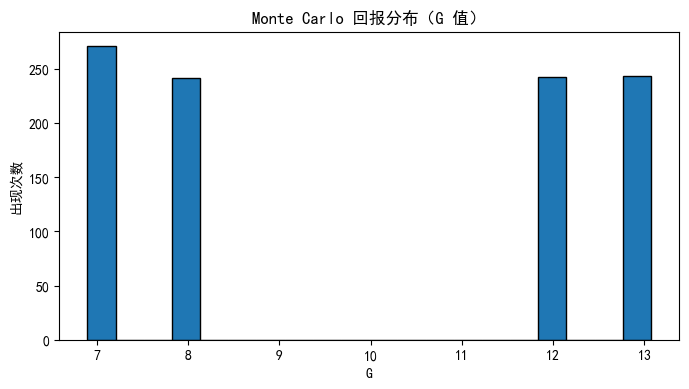

In [251]:
plt.figure(figsize=(8,4))
plt.hist(returns, bins=20, edgecolor='black')
plt.title("Monte Carlo 回报分布（G 值）")
plt.xlabel("G")
plt.ylabel("出现次数")
plt.show()

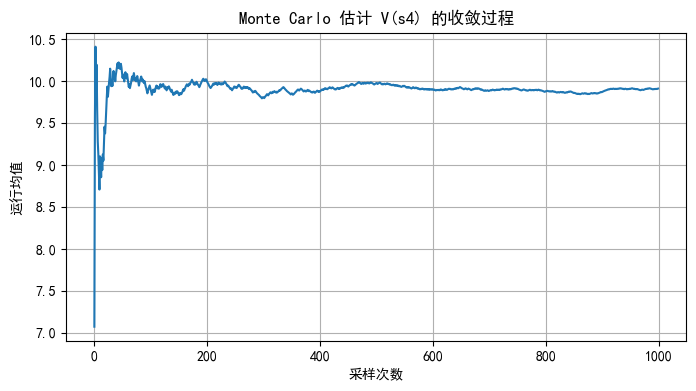

In [252]:
running_avg = np.cumsum(returns) / np.arange(1, len(returns)+1)

plt.figure(figsize=(8,4))
plt.plot(running_avg)
plt.title("Monte Carlo 估计 V(s4) 的收敛过程")
plt.xlabel("采样次数")
plt.ylabel("运行均值")
plt.grid()
plt.show()


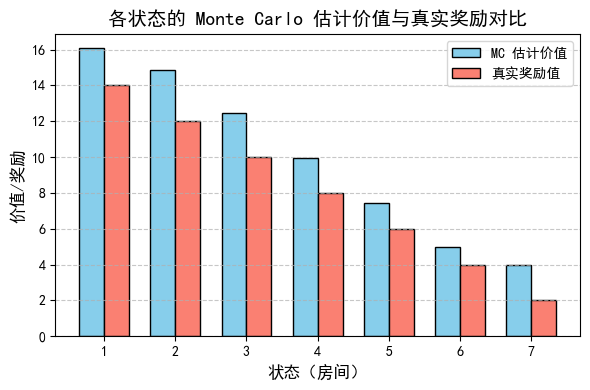

In [253]:
V_all = []
for s in range(7):
    _, V_s = mc_value(start_state=s, episodes=2000)
    V_all.append(V_s)
states = range(1, 8)  # 状态 1-7
# 创建画布
plt.figure(figsize=(6, 4))

# 绘制双柱状图（并列对比）
bar_width = 0.35  # 柱子宽度
x = np.arange(len(states))  # 状态索引

# 绘制 Monte Carlo 估计值
plt.bar(x - bar_width/2, V_all, width=bar_width, label='MC 估计价值', color='skyblue', edgecolor='black')
# 绘制真实奖励值
plt.bar(x + bar_width/2, REWARDS, width=bar_width, label='真实奖励值', color='salmon', edgecolor='black')

# 添加标签和标题
plt.xlabel('状态（房间）', fontsize=12)
plt.ylabel('价值/奖励', fontsize=12)
plt.title('各状态的 Monte Carlo 估计价值与真实奖励对比', fontsize=14)
plt.xticks(x, states)  # 设置 x 轴刻度为状态值
plt.legend()  # 显示图例

# 添加网格线（可选，增强可读性）
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # 自动调整布局
plt.show()
